## 4. Find Waldo (Charlie): template matching

Participants: Yueying CAO

Use patch-wise Normalized Cross Correlation (NCC) to automatically find Waldo (Charlie) in an image. To this end, look for the template image (``charlie-template``) inside ``marche-crop`` or the ``marche`` images. As the process can be long start with the cropped version, you might also find it useful to create a separate notebook for this task only. Evaluate the NCC expression from the slides (non-local means) to compare the template with every location in the target image, store the results and retrieve the location with the highest NCC score. Draw this location on the target image.

**Describe the process assumptions and limitations**

In [1]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def NCC(img, template):
    sigmaN_template = template.shape[0]*template.shape[1]
    ncc = np.zeros((img.shape[0]-template.shape[0]+1, img.shape[1]-template.shape[1]+1))
    
    # compute template
    N_template = (template-np.mean(template))/sigmaN_template
            
    # computation in input image
    for i in range(img.shape[0]-template.shape[0]+1):
        for j in range(img.shape[1]-template.shape[1]+1):
            img_uv = img[i:i+template.shape[0],j:j+template.shape[1]]
            N_img = (img_uv-np.mean(img_uv))/sigmaN_template
            
            ncc[i,j] = np.sum(N_template*N_img)
    print('NCC matrix shape is : ', ncc.shape)
    
    # search the index of the maximum
    row, col = np.where(ncc==np.max(ncc))
    
    return row, col
    

NCC matrix shape is :  (753, 758)


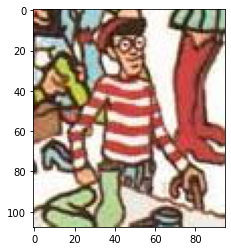

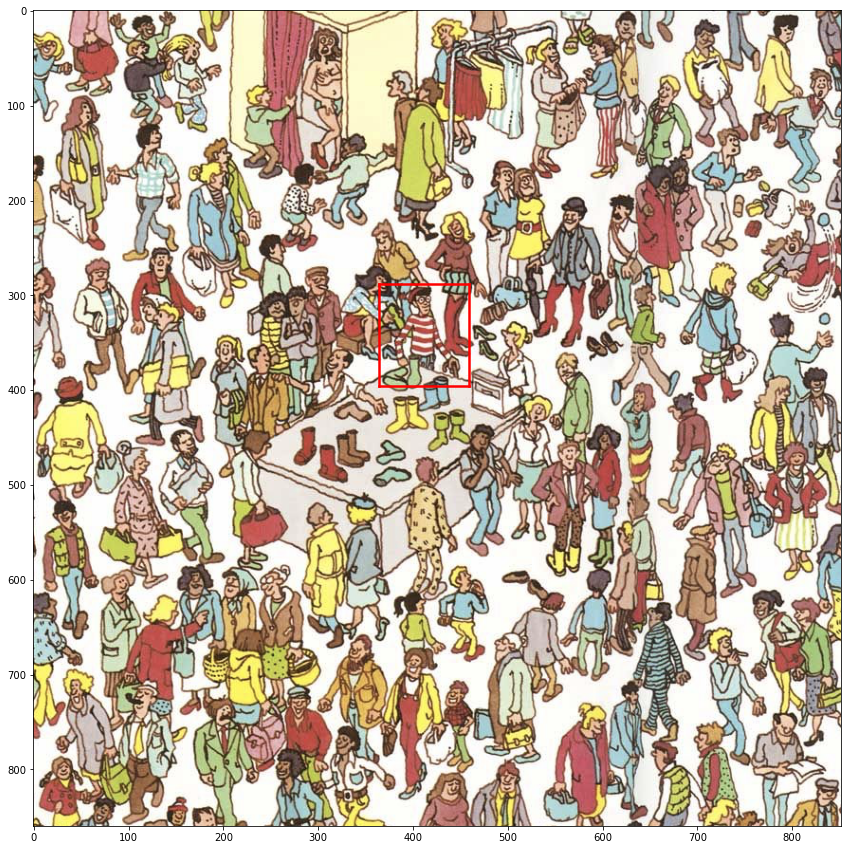

In [3]:
Template = "./images/charlie/charlie-template.jpeg"
Marche = "./images/charlie/marche-crop.png"
#Marche = "./images/charlie/marche.jpg" 

template = io.imread(Template, as_gray=True)
marche = io.imread(Marche,as_gray=True)

r, c = NCC(marche, template)

# re-read images as color images
marche = io.imread(Marche)
template = io.imread(Template)

plt.figure()
plt.imshow(template)

width=15
height=15
plt.rcParams['figure.figsize']=[width, height]
plt.figure()
plt.imshow(marche,cmap='gray')

# plot the border
plt.plot((c, c), (r, r+template.shape[0]), color='r', linewidth=2.5)
plt.plot((c, c+template.shape[1]), (r, r), color='r', linewidth=2.5)
plt.plot((c+template.shape[1], c+template.shape[1]), (r, r+template.shape[0]), color='r', linewidth=2.5)
plt.plot((c, c+template.shape[1]), (r+template.shape[0], r+template.shape[0]), color='r', linewidth=2.5)